# Segmentation of Buildings on Satellite Images

This the third training session of my yolov8 model

In [1]:
# This is the only installation necessary to run this notebook on google colab
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalle

## Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as im
from ultralytics import YOLO
from IPython.display import Image, display

## Linking to my Google Drive and Unzipping the Dataset

In [2]:
# Setting up the data
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
zipfile_data = zipfile.ZipFile('/content/drive/MyDrive/Projects/Zipped_Data/Capstone.zip', 'r')
unzipped_data = zipfile_data.extractall('/content/data')
zipfile_data.close()

## Instantiating and Training the Model

In [22]:
#Instanciating the previously crashed model that trained for 20 epochs
model = YOLO('/content/50_epochs.pt')

In [24]:
#Define a destination directory for all results
project_results = "/content/data"
#Define subdirectory for this specific model training
model_1 = "200_epochs-" #note that if you run the training again, it creates another directory

In [25]:
# This is the third training session for this model
results = model.train(data='/content/data/data.yaml',
                      project=project_results,
                      name=model_1,
                      epochs=200,
                      patience=0, #I am setting patience=0 to disable early stopping, beause the model is nowhere near ready to deploy
                      batch=6, # For this training I am choosing a training batch of 6 to compare the training time to the batch of 4 used before
                      imgsz=640)

Ultralytics YOLOv8.0.207 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=/content/50_epochs.pt, data=/content/data/data.yaml, epochs=200, patience=0, batch=6, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/data, name=200_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

## Reviewing the Evaluation Metrics and Predictions

These results a proof to me that it is time to try new approaches to increase the performance of the model. Please review the executive summary in this repository learn more of what my future steps will be. 

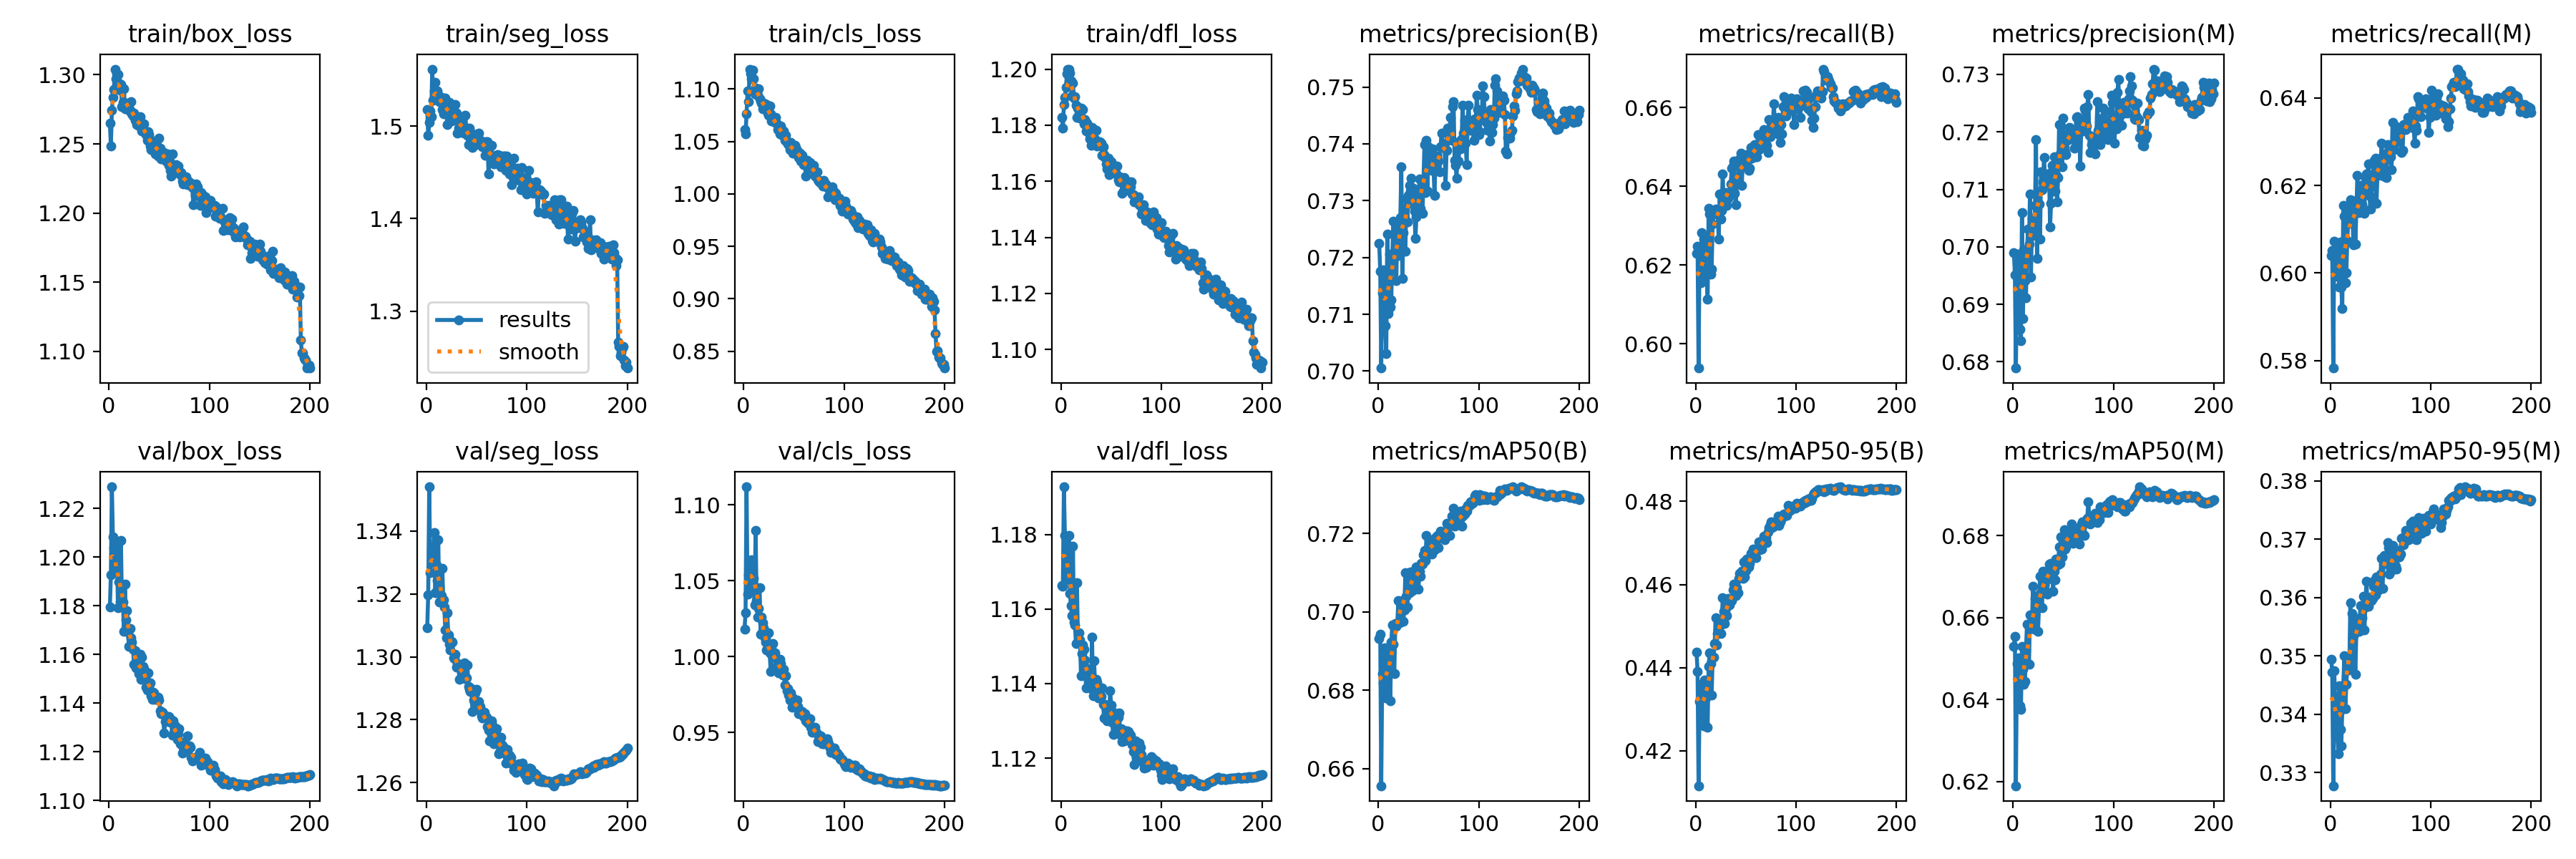

In [26]:
Image("/content/data/200_epochs-/results.png")

#### Comparing the same training batch from the 2nd training session and the 3rd training session; if you look closely the 3rd training sessions best model is performing worse! I did save the best model at around 107 epochs which had the highest mAP and I will use that model moving forward. 

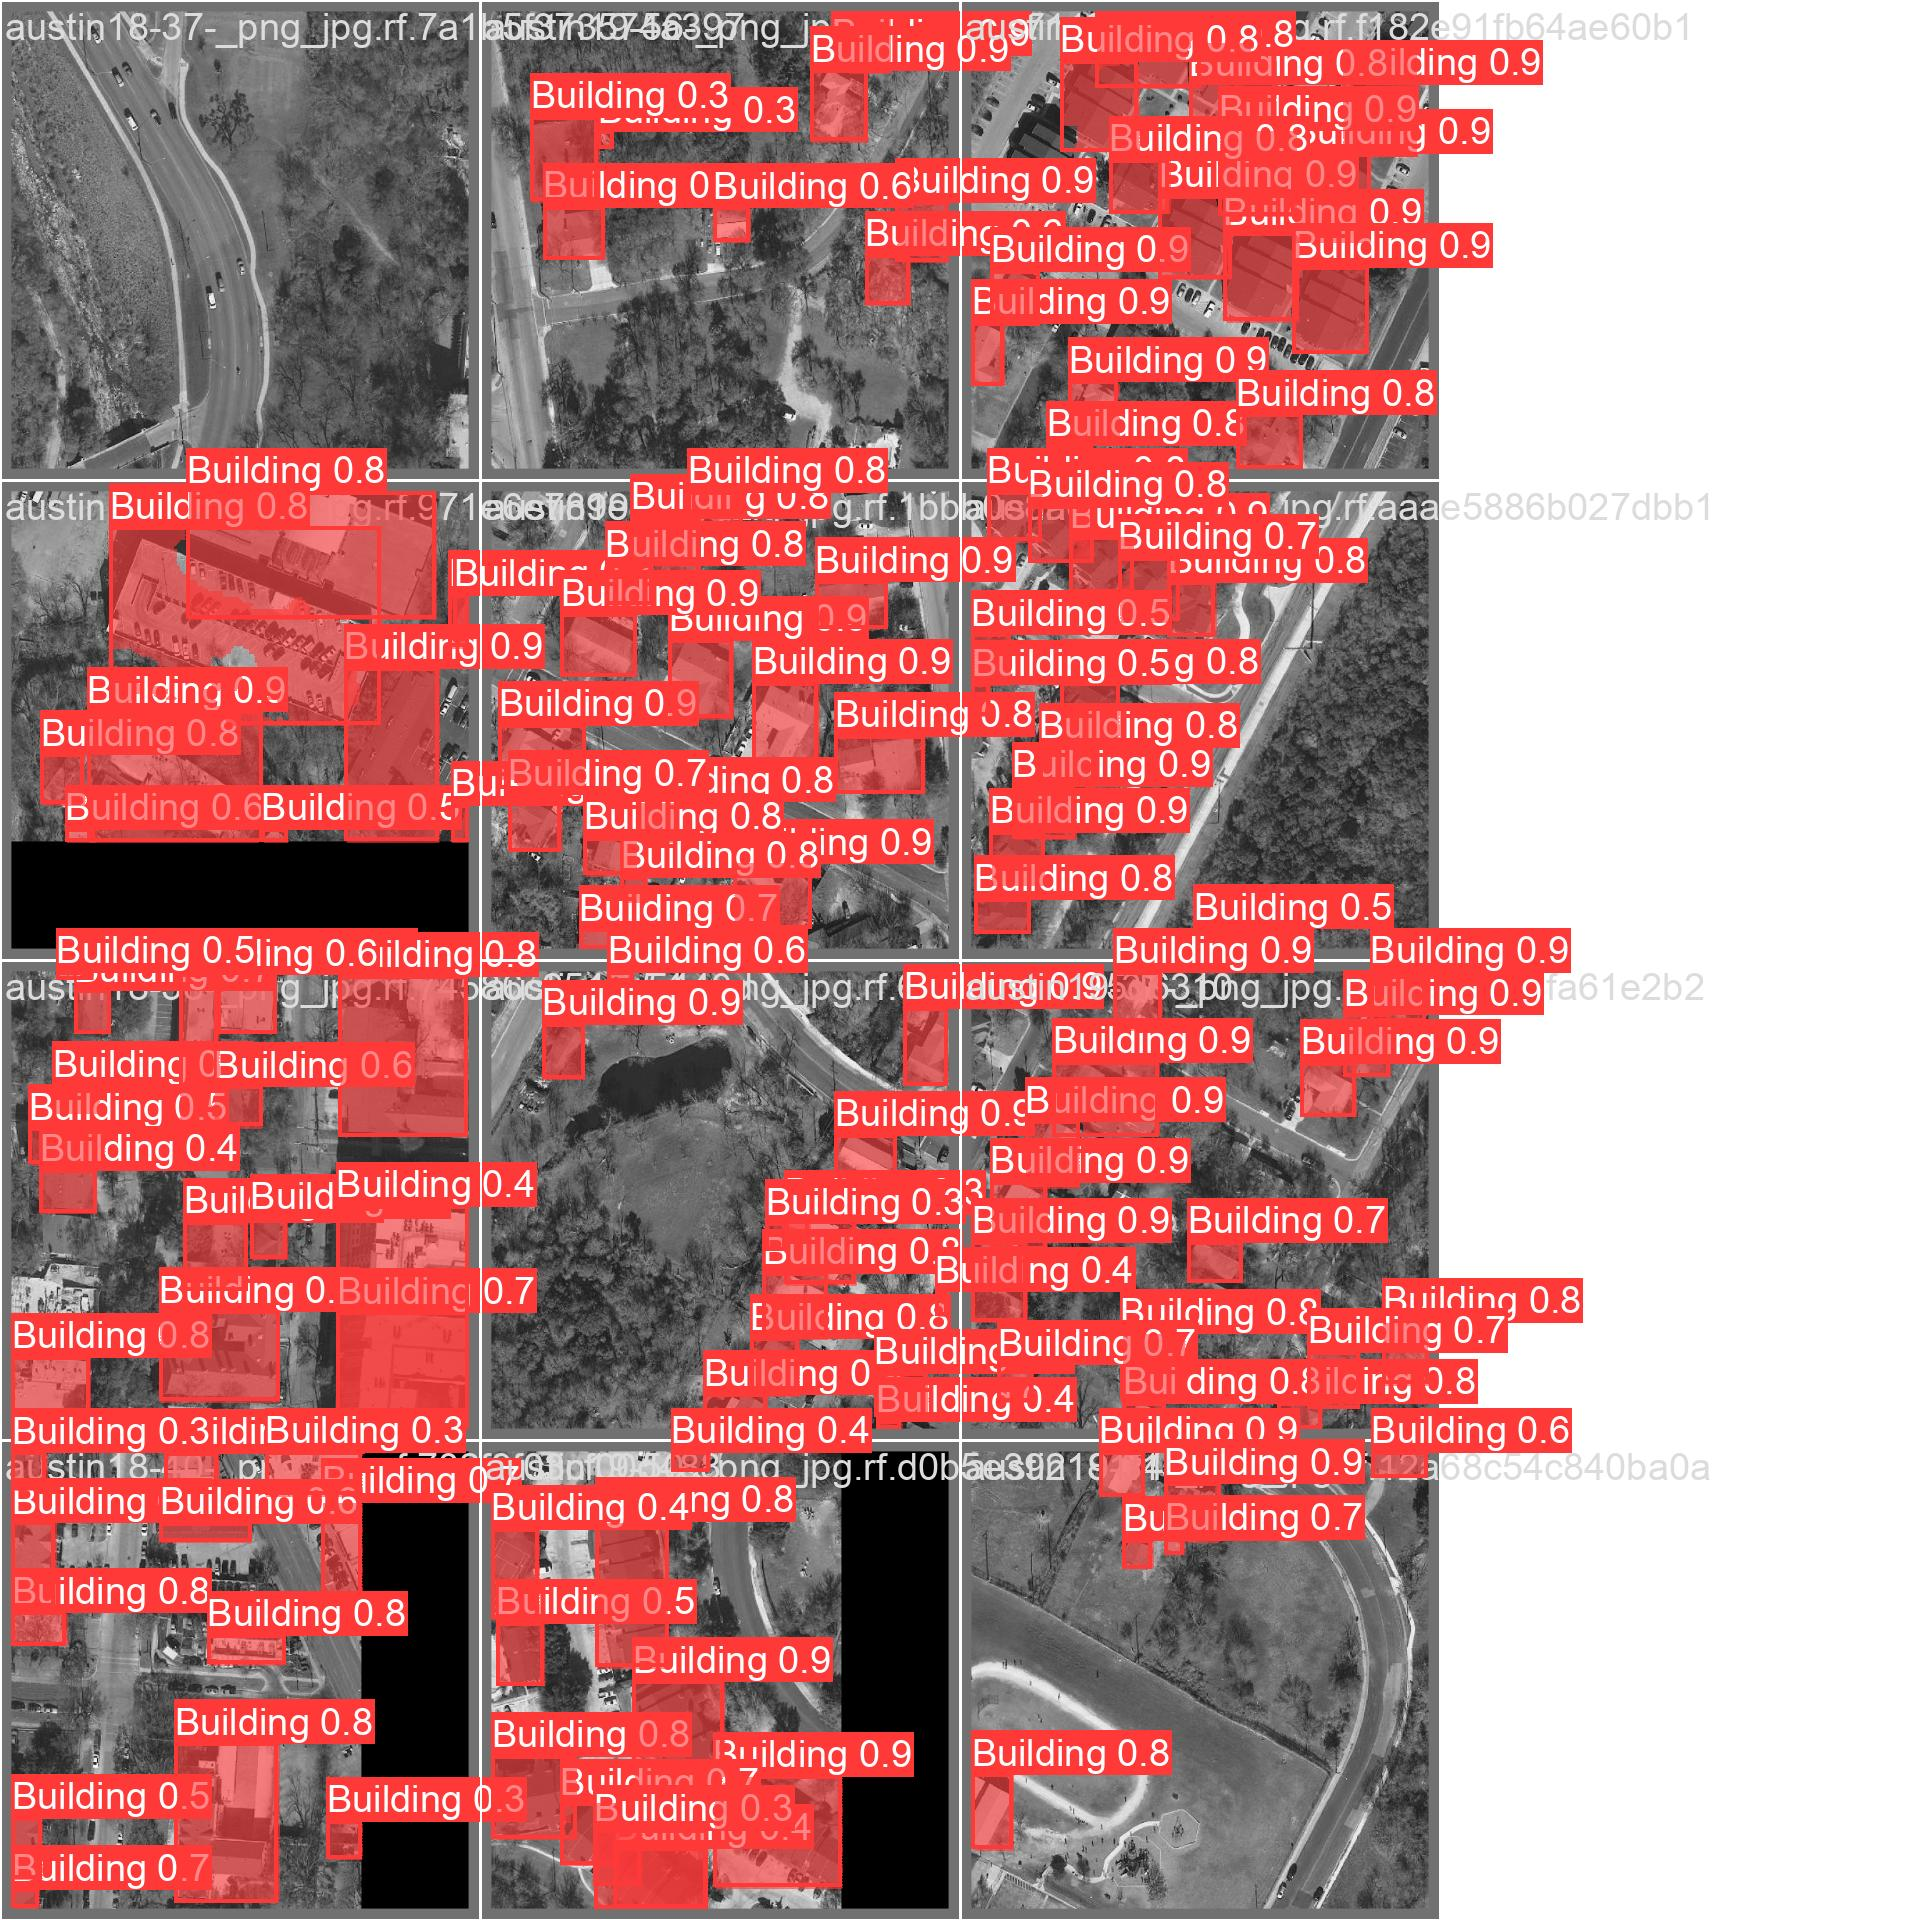

In [27]:
Image(filename='/content/data/200_epochs-/val_batch2_pred.jpg')

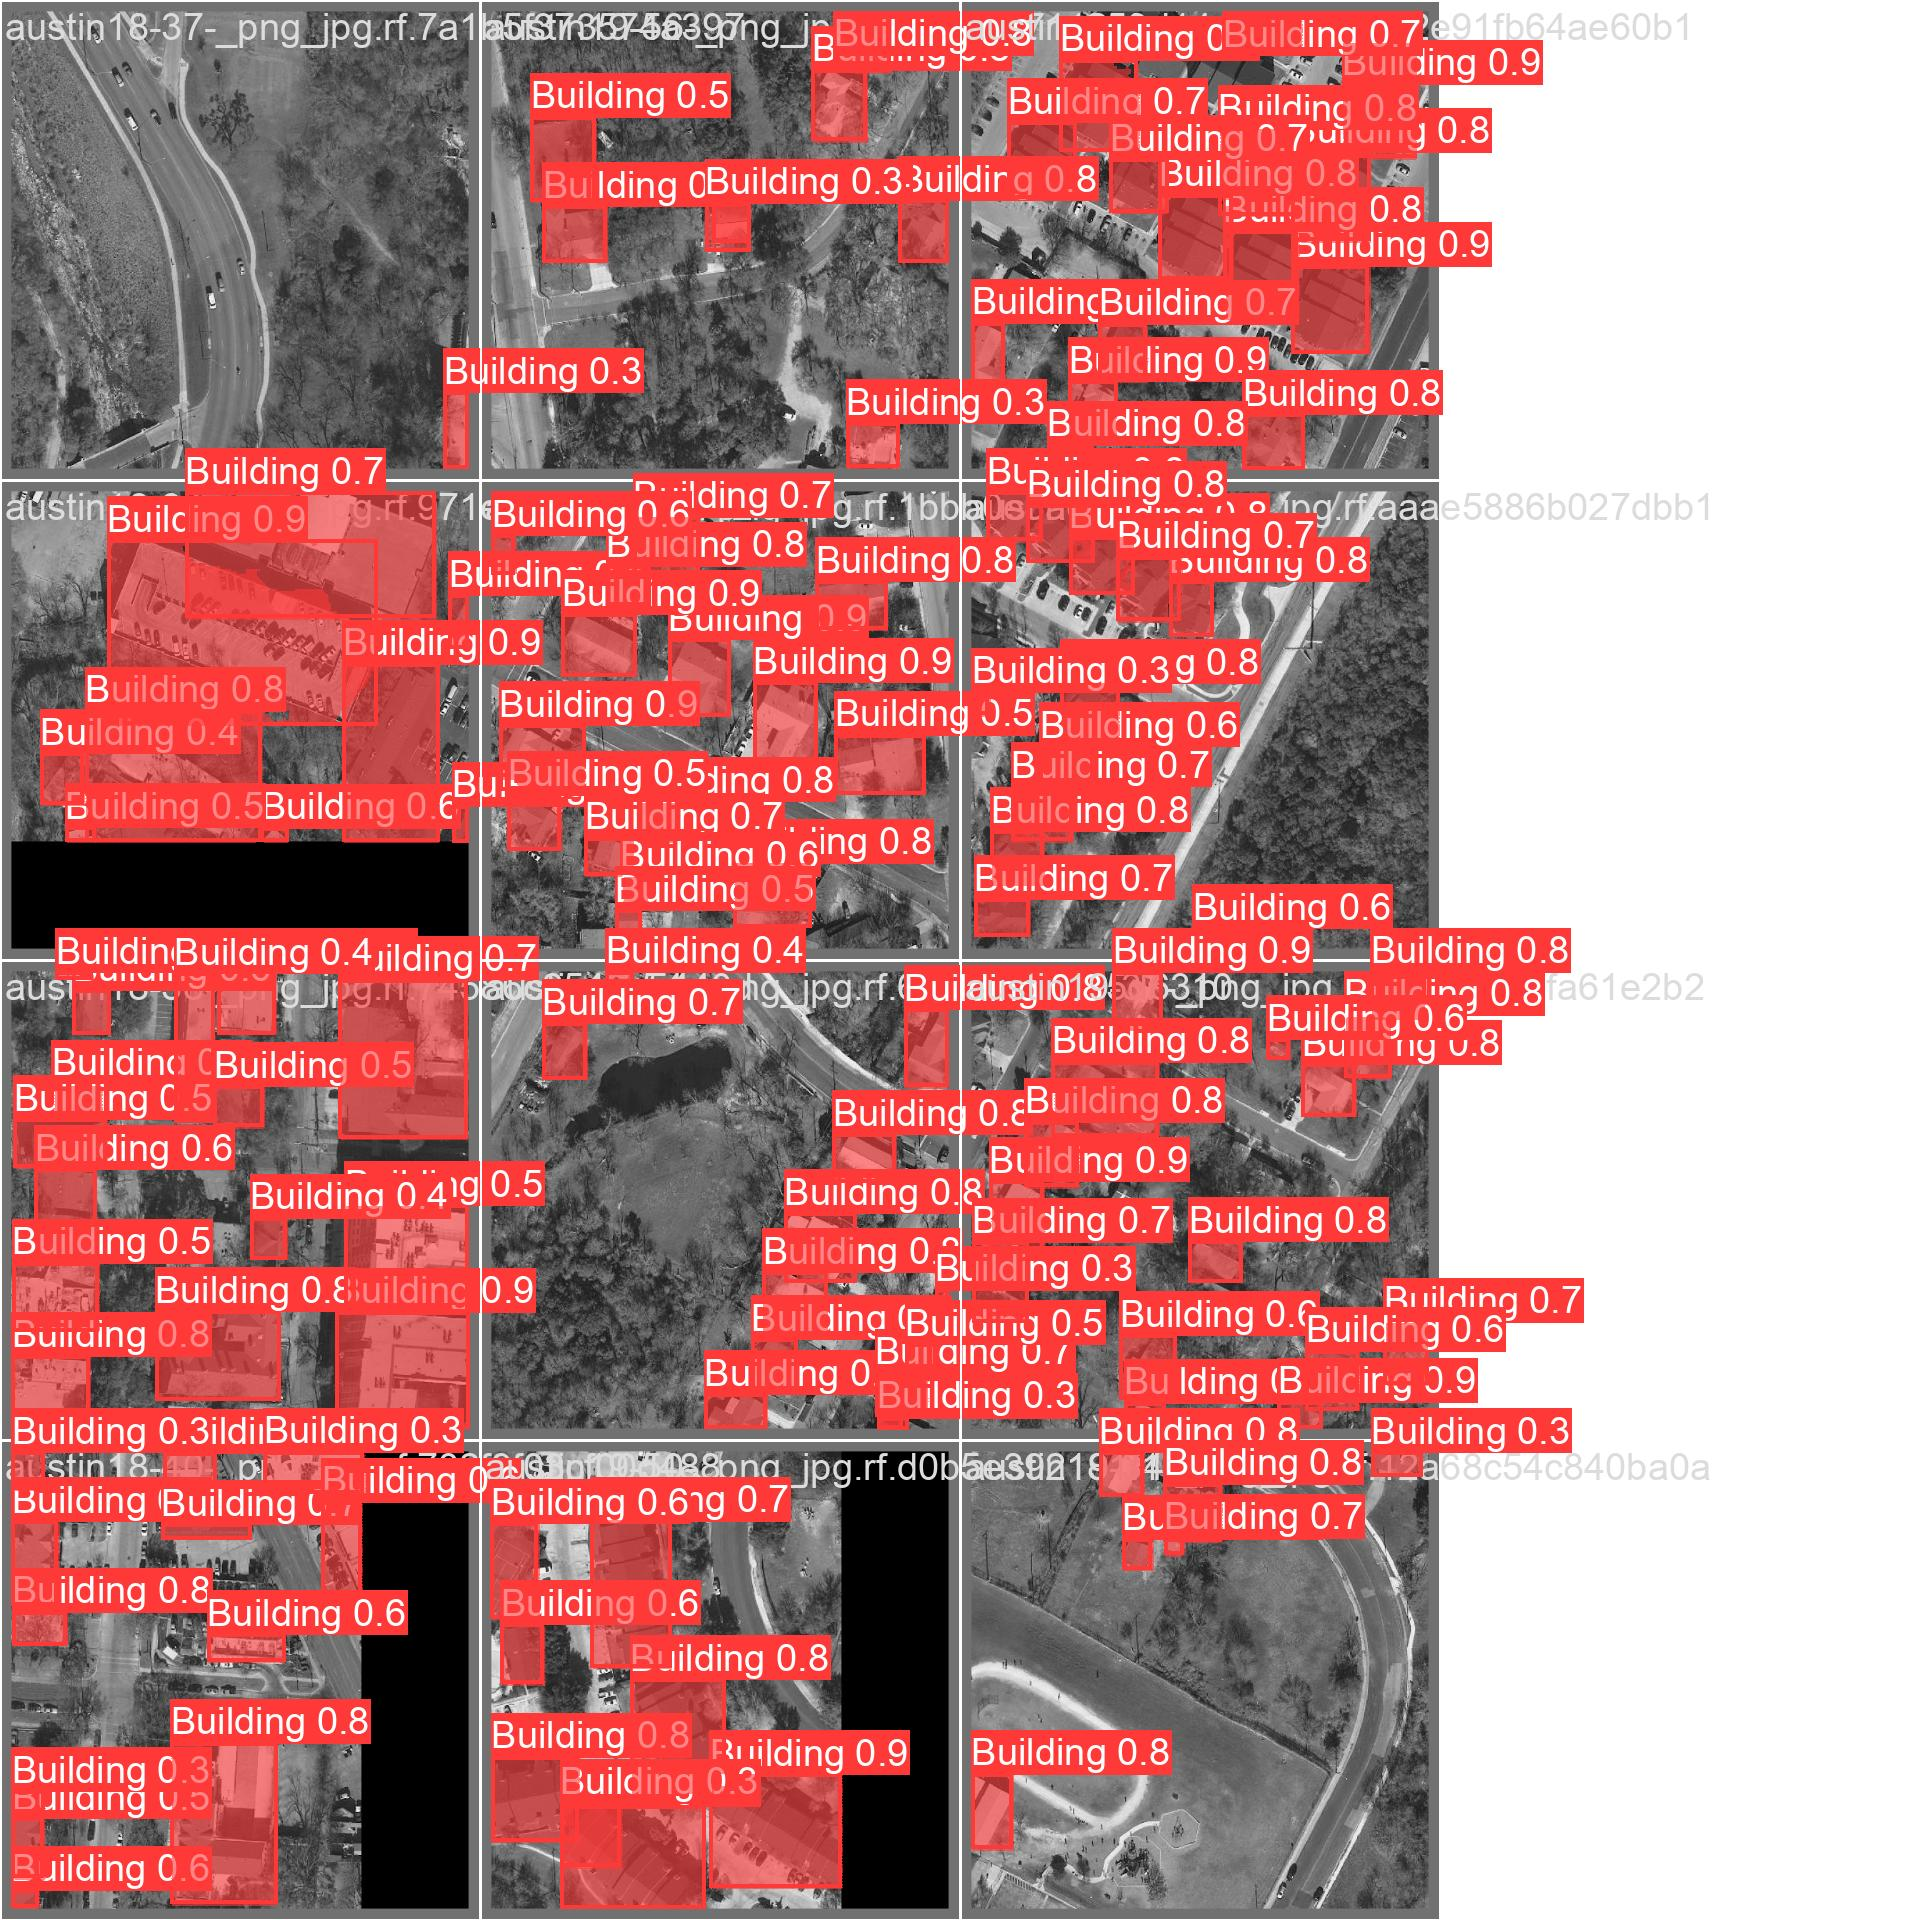

In [14]:
Image(filename='/content/data/15_epochs-/val_batch2_pred.jpg')

#### Further comparison of predictions between 50 epochs and 250 epochs

Again the 250 epochs model performed worse. 

In [28]:
trained_model_1 = YOLO('/content/data/15_epochs-/weights/best.pt')
trained_model_2 = YOLO('/content/data/200_epochs-/weights/best.pt')

In [31]:
test_image_1 = '/content/drive/MyDrive/Projects/Unzipped_Data/Denver_Metro_Area_Prediction_Images/Broomfield_3.jpg'

In [32]:
result_1 = trained_model_1.predict(test_image_1, conf=0.2)
result_2 = trained_model_2.predict(test_image_1, conf=0.2)


image 1/1 /content/drive/MyDrive/Projects/Unzipped_Data/Denver_Metro_Area_Prediction_Images/Broomfield_3.jpg: 384x640 27 Buildings, 15.4ms
Speed: 1.9ms preprocess, 15.4ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/Projects/Unzipped_Data/Denver_Metro_Area_Prediction_Images/Broomfield_3.jpg: 384x640 24 Buildings, 10.3ms
Speed: 1.5ms preprocess, 10.3ms inference, 8.7ms postprocess per image at shape (1, 3, 384, 640)


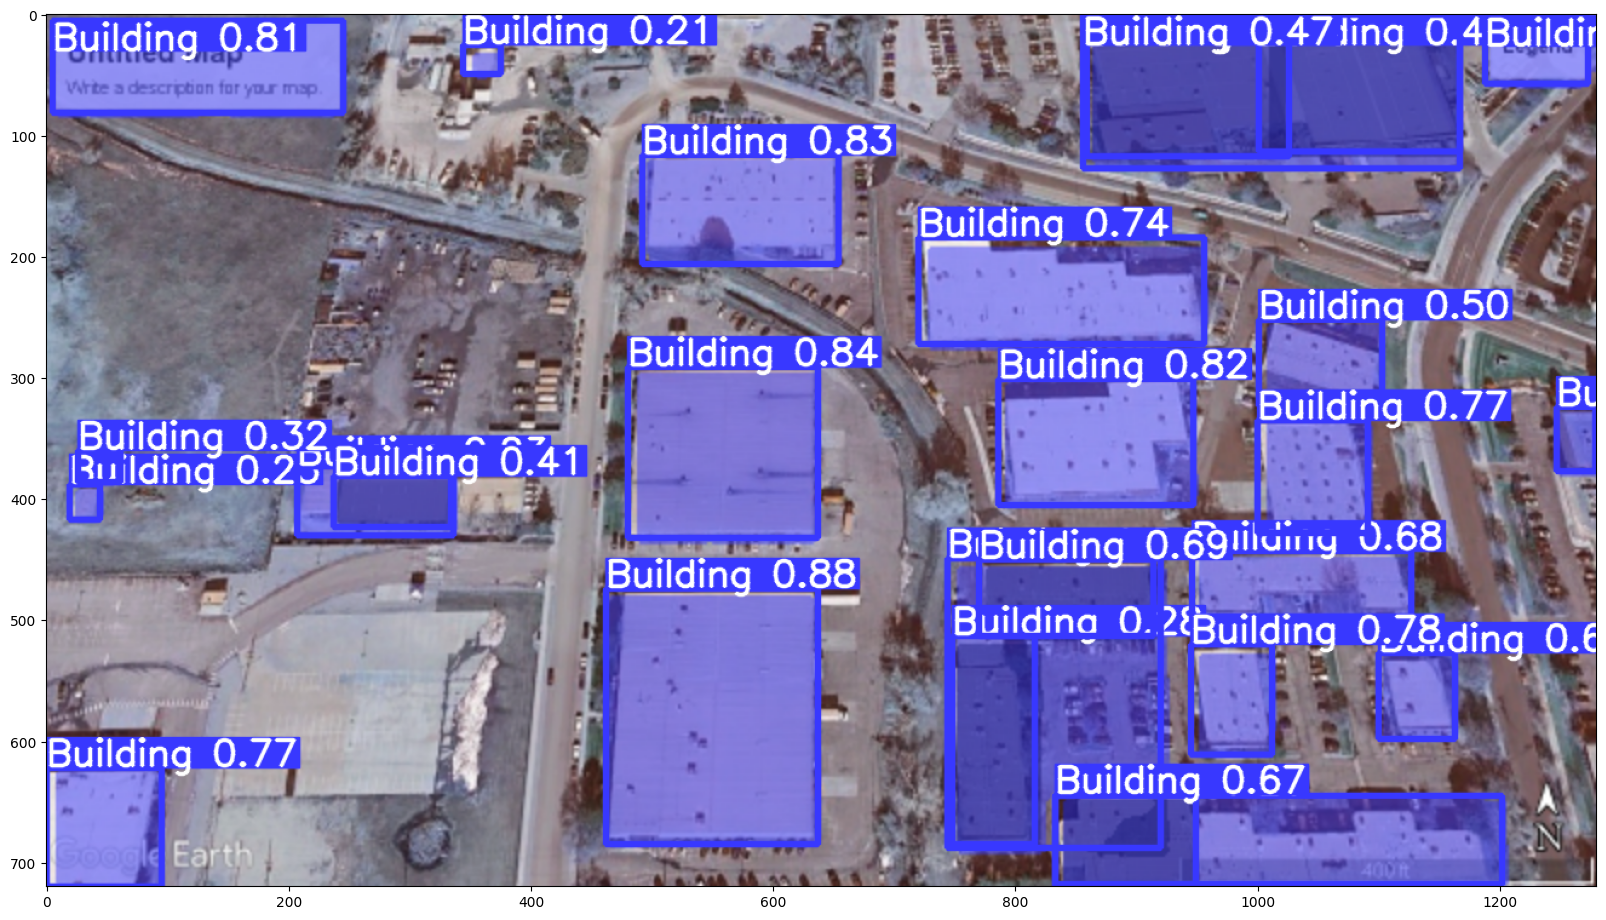

In [35]:
test_image_1_array = result_1[0].plot()
plt.figure(figsize=(20, 20))
plt.imshow(test_image_1_array)

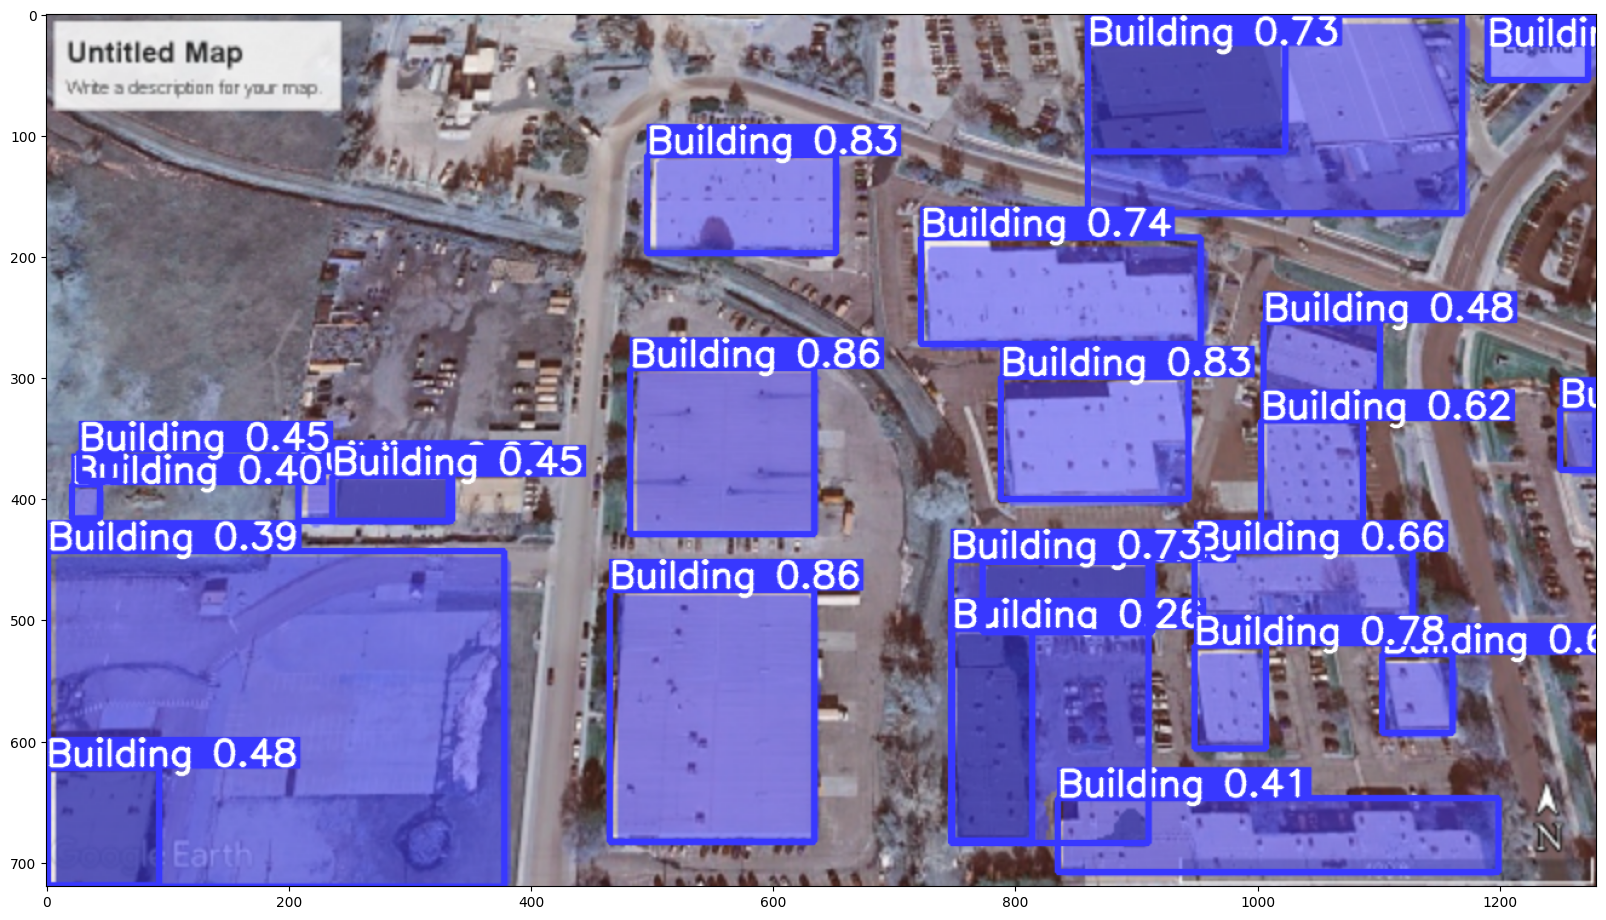

In [36]:
test_image_1_array = result_2[0].plot()
plt.figure(figsize=(20, 20))
plt.imshow(test_image_1_array)